# Custom CNN architecture

In [1]:
# Run the previous notebook to load all its classes and functions
%run busi_augmentation_2.ipynb

Found 210 images and 211 masks in malignant folder


Processing malignant masks: 100%|███████████████████████████████████████████████████| 211/211 [00:00<00:00, 710.44it/s]


Found 133 images and 133 masks in normal folder


Processing normal masks: 100%|██████████████████████████████████████████████████████| 133/133 [00:00<00:00, 295.56it/s]


Found 437 images and 454 masks in benign folder


Processing benign masks: 100%|██████████████████████████████████████████████████████| 454/454 [00:00<00:00, 643.35it/s]


Combined 2 masks for malignant (53).png
Combined 2 masks for benign (100).png
Combined 2 masks for benign (163).png
Combined 2 masks for benign (173).png
Combined 2 masks for benign (181).png
Combined 3 masks for benign (195).png
Combined 2 masks for benign (25).png
Combined 2 masks for benign (315).png
Combined 2 masks for benign (346).png
Combined 2 masks for benign (4).png
Combined 2 masks for benign (424).png
Combined 2 masks for benign (54).png
Combined 2 masks for benign (58).png
Combined 2 masks for benign (83).png
Combined 2 masks for benign (92).png
Combined 2 masks for benign (93).png
Combined 2 masks for benign (98).png
Dataset shape: (780, 224, 224, 1)
Masks shape: (780, 224, 224, 1)
Labels shape: (780,)
Class distribution: Normal: 133, Benign: 437, Malignant: 210
Training set sizes: X_train: (546, 224, 224, 1), y_train: (546,), masks: (780, 224, 224, 1)
Augmented training set sizes: X_aug: (1758, 224, 224, 1), y_aug: (1758,), masks: (1758, 224, 224, 1)
Validation set sizes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

import seaborn as sns
import time

In [3]:
print(X_aug.shape)
print(y_aug.shape)
print(masks_aug.shape)

(1758, 224, 224, 1)
(1758,)
(1758, 224, 224, 1)


# Apply MINMAX normalization (suitable for CNNs custom)

In [4]:
# Train
X_train_aug = X_aug.astype("float32") / 255.0
masks_train_aug = masks_aug.astype("float32") / 255.0
y_train_aug = y_aug

# Test
X_test = X_test.astype("float32") / 255.0
masks_test = masks_test.astype("float32") / 255.0
y_test = y_test

# Validation
X_val = X_val.astype("float32") / 255.0
masks_val = masks_val.astype("float32") / 255.0
y_val = y_val



# Custom CNNs

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

# Hyperparameter options
# nr_filters_layer_1 = [32, 64, 128]
# kernel_sizes = [(2, 2), (3, 3)]
activations = [
    ("relu", "relu"),
    ("leakyrelu", LeakyReLU(negative_slope=0.01))
]
# dropout_sizes = [0.4, 0.5]
dense_layers =[32, 64, 128]


histories = []

# Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=13, stratify=y
# )

# for nr_filters_layer_1_option in nr_filters_layer_1:
for dense_nr in dense_layers:
    for activation_name, activation_fn in activations:
            print(
                f"Training model with: "
                # f"nr_filters={nr_filters_layer_1_option}, "
                f"activation={activation_name}, "
                f"dense_layer={dense_nr}"
            )

            kernel_size_option = (3,3)

            # Model definition
            model = Sequential([
                Input(shape=(224, 224, 1)),
                Conv2D(32, kernel_size=kernel_size_option, activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Conv2D(64, kernel_size=kernel_size_option, activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Conv2D(64 * 2, kernel_size=kernel_size_option, activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Flatten(),
                Dense(128, activation=activation_fn),
                Dropout(0.5),
                Dense(3, activation='softmax')
            ])

            # Compile
            model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train
            history = model.fit(
                X_train_aug, y_train_aug,
                validation_data=(X_val, y_val),
                epochs=15,
                batch_size=32,
                callbacks=[early_stop]
            )

            # Save
            label = (
                f"dense_nr={dense_nr}, "
                f"activation={activation_name} "
            )
            histories.append((label, history))


Training model with: activation=relu, dense_layer=32
Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 534ms/step - accuracy: 0.4064 - loss: 1.2815 - val_accuracy: 0.5641 - val_loss: 1.0327
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 520ms/step - accuracy: 0.5182 - loss: 0.9900 - val_accuracy: 0.5812 - val_loss: 0.8858
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.6666 - loss: 0.7421 - val_accuracy: 0.6154 - val_loss: 0.8621
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 569ms/step - accuracy: 0.8003 - loss: 0.5104 - val_accuracy: 0.5983 - val_loss: 0.8557
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 606ms/step - accuracy: 0.8895 - loss: 0.2956 - val_accuracy: 0.6154 - val_loss: 0.9884
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 655ms/step - accuracy: 0.9631 - loss: 0.1461 - val_accuracy: 0.6239 - val_loss: 1.1727
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 662ms/step - accuracy: 0.9621 - loss: 0.1067 - val_accuracy: 0.6154 - val_loss: 1.4283
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 64

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Model from article

In [8]:
model = Sequential([
    # Input layer (grayscale images 224x224x1)
    Input(shape=(224, 224, 1)),

    # Convolutional layer: 20 filters, kernel size 5x5
    Conv2D(20, (5, 5), padding="same"),
    
    # Batch Normalization (20 channels)
    BatchNormalization(),
    
    # ReLU activation
    Activation("relu"),
    
    # MaxPooling
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten before fully connected
    Flatten(),
    
    # Fully connected layer (let’s use 128 units)
    Dense(128, activation="relu"),
    
    # Dropout 50%
    Dropout(0.5),
    
    # Output layer with 3 classes
    Dense(3, activation="softmax")
])

In [ ]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)

a= 69
# Save
label = (
    f"nr_filters={a}, "
    f"kernel_size={a}, "
    f"activation={a}, "
    f"dropout={a}"
)
histories.append((label, history))

Epoch 1/15
15/55 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3738 - loss: 67.0451

# Recommended 1

In [9]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(224, 224, 1)),
    
    Conv2D(32, (3, 3), padding="same", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(3, activation="softmax")
])


In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,     
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=40,
    callbacks=[early_stop]
)

# Save
label = (
    f"recommended_approach"
)

histories.append((label, history))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3965 - loss: 6.6620 - val_accuracy: 0.5556 - val_loss: 1.3355
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5312 - loss: 1.3162 - val_accuracy: 0.5556 - val_loss: 1.2946
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5823 - loss: 1.2639 - val_accuracy: 0.5556 - val_loss: 1.3387
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5582 - loss: 1.2641 - val_accuracy: 0.5556 - val_loss: 1.2990
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5395 - loss: 1.2423 - val_accuracy: 0.5556 - val_loss: 1.2765
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5579 - loss: 1.2223 - val_accuracy: 0.5556 - val_loss: 1.2651
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5657 - loss: 1.1985 - val_accuracy: 0.5556 - val_loss: 1.2456
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5758 - loss: 1.3017 - val_accuracy: 0.5556 - val_loss:

# Recommended 2

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization

model = Sequential([
    Input(shape=(224, 224, 1)),
    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(),

    Flatten(),
    Dense(64),
    LeakyReLU(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)


NameError: name 'X_train_final' is not defined

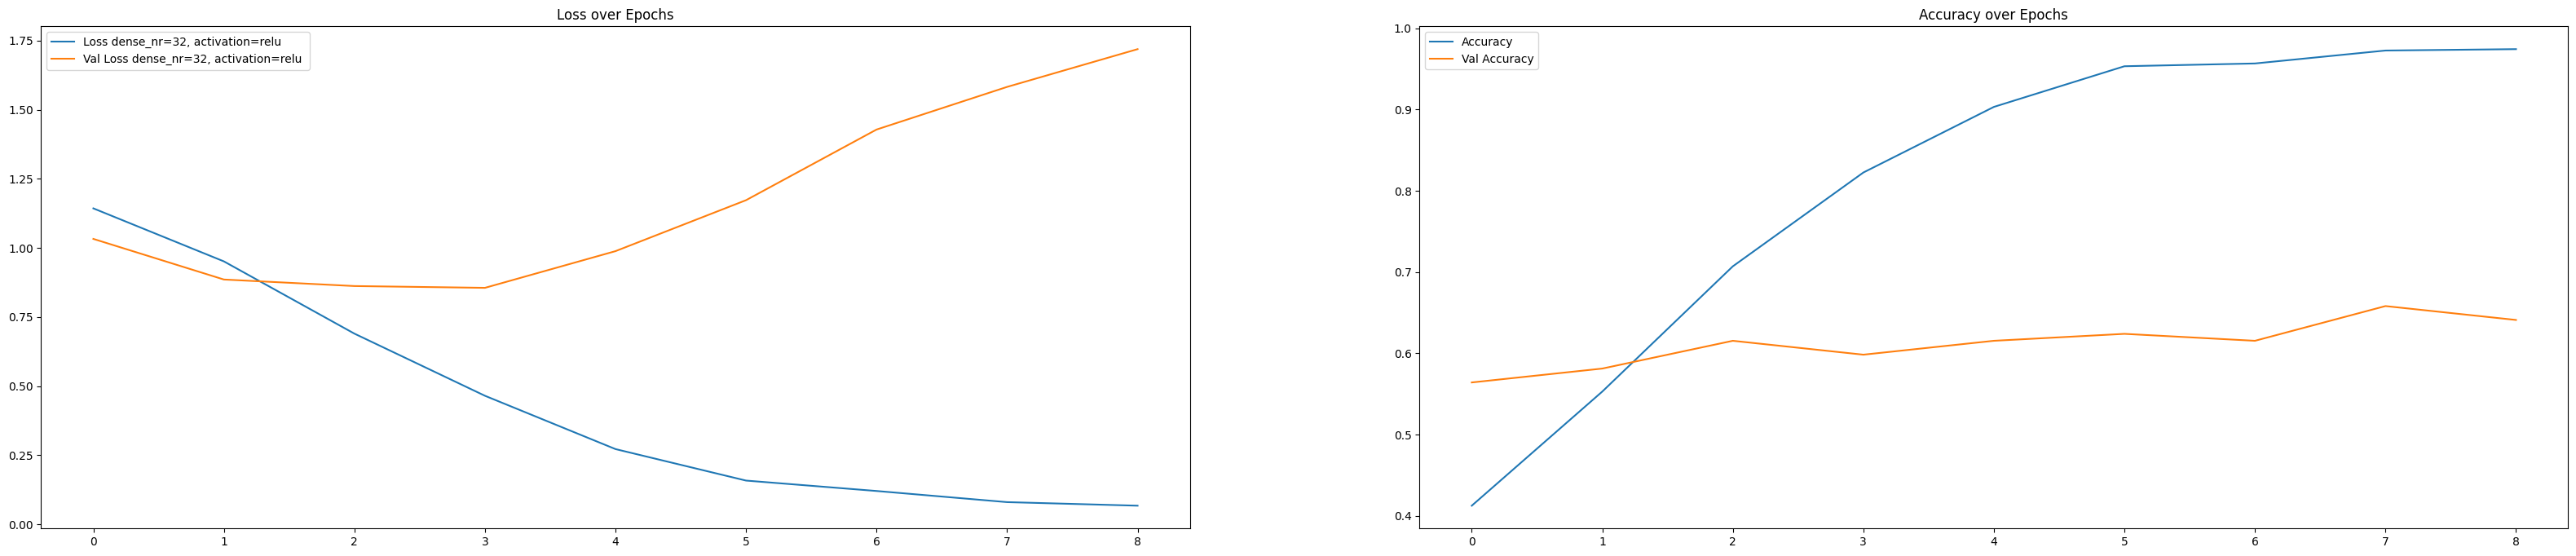

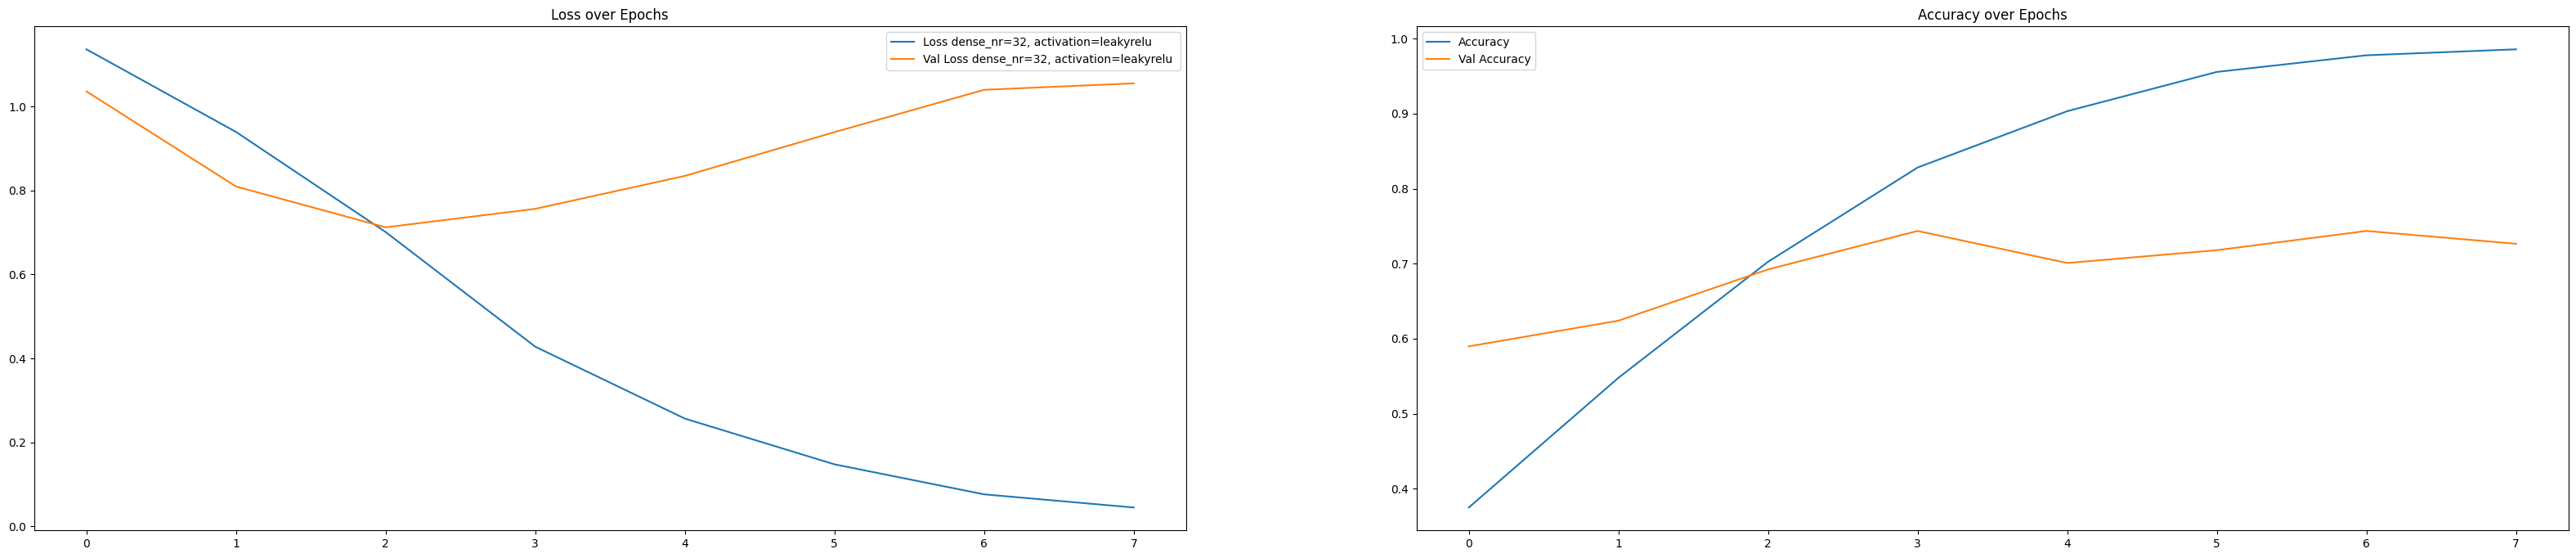

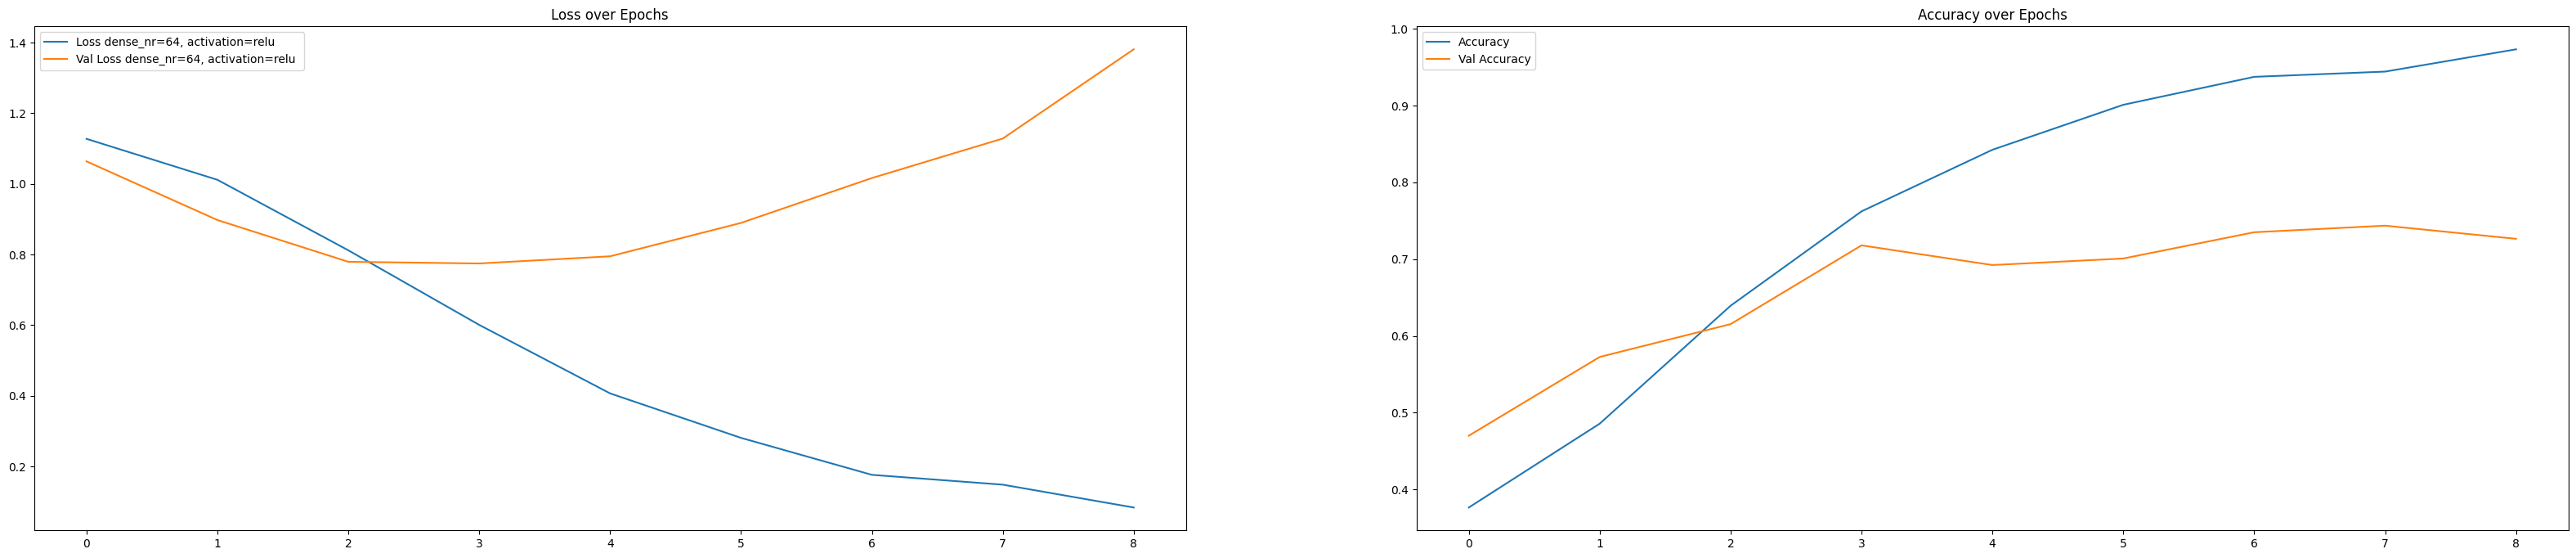

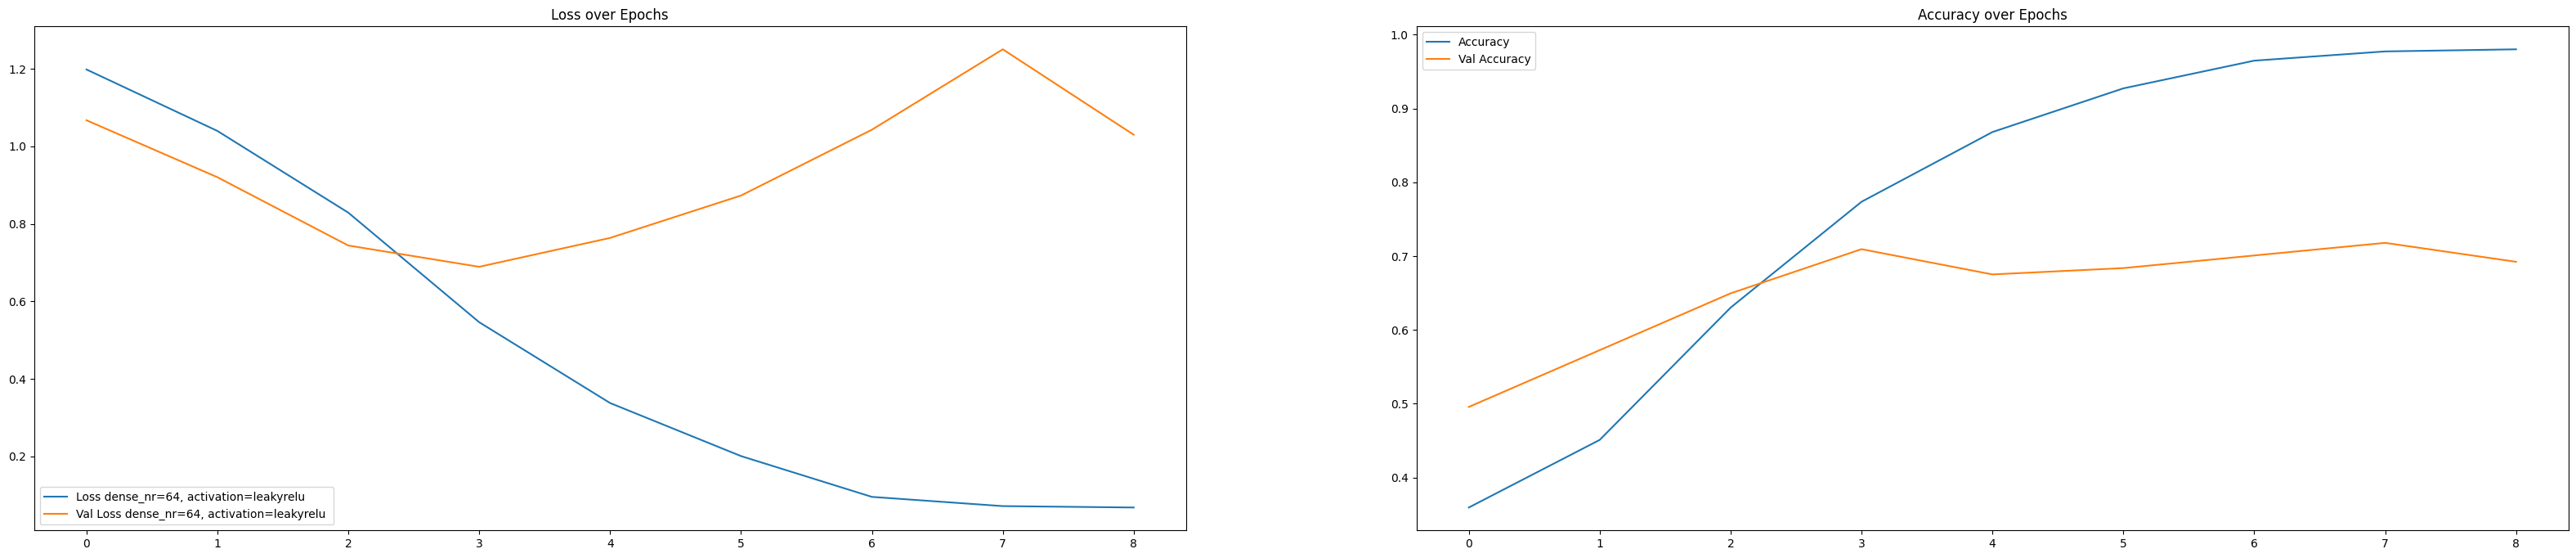

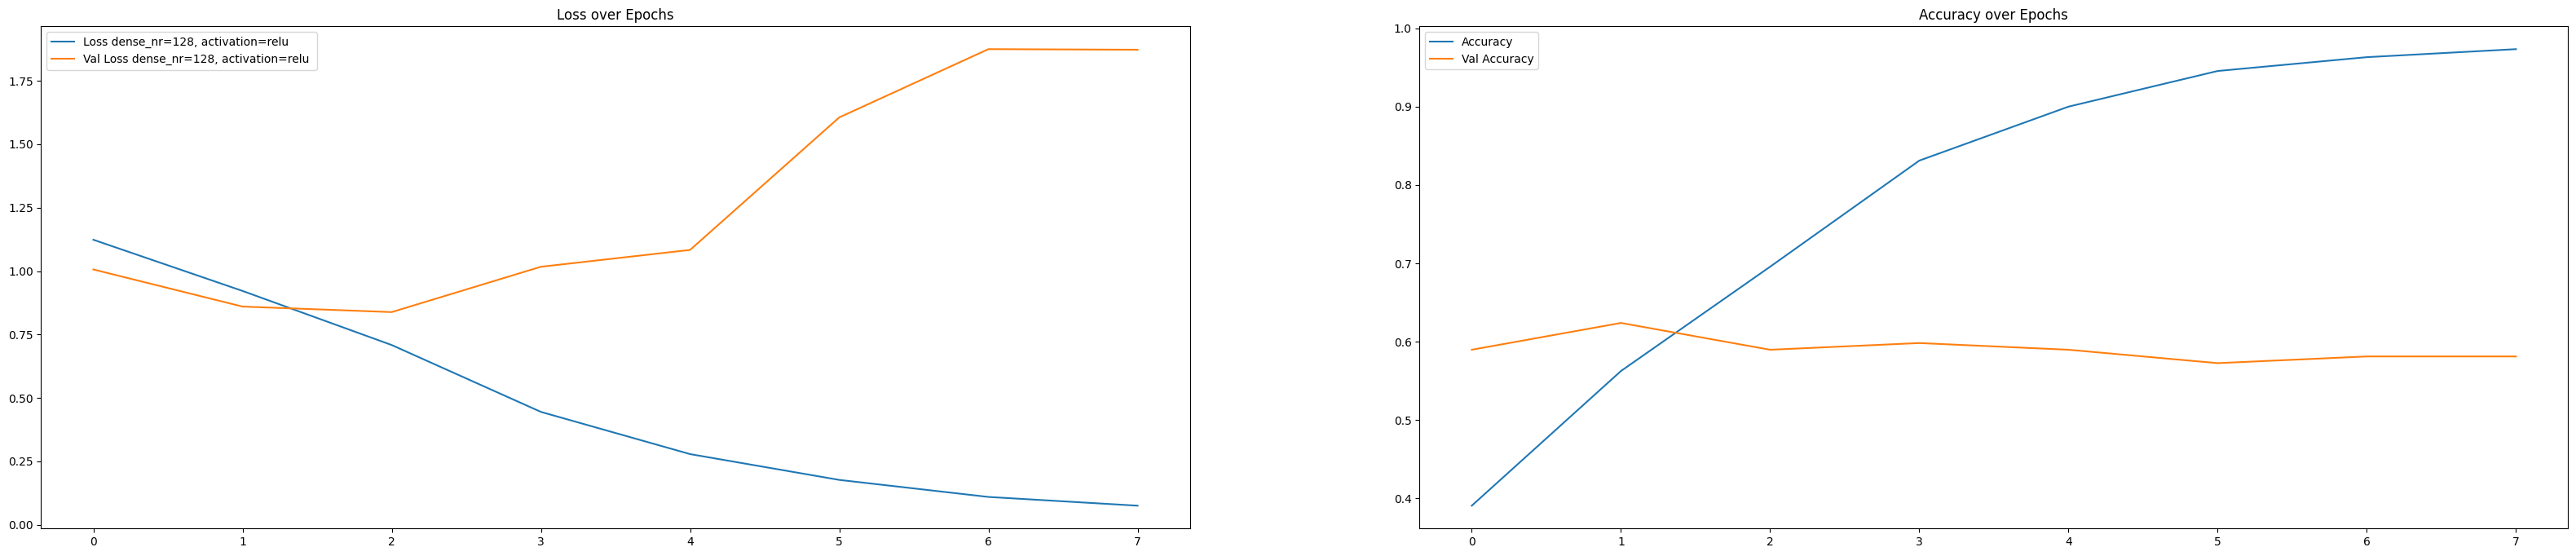

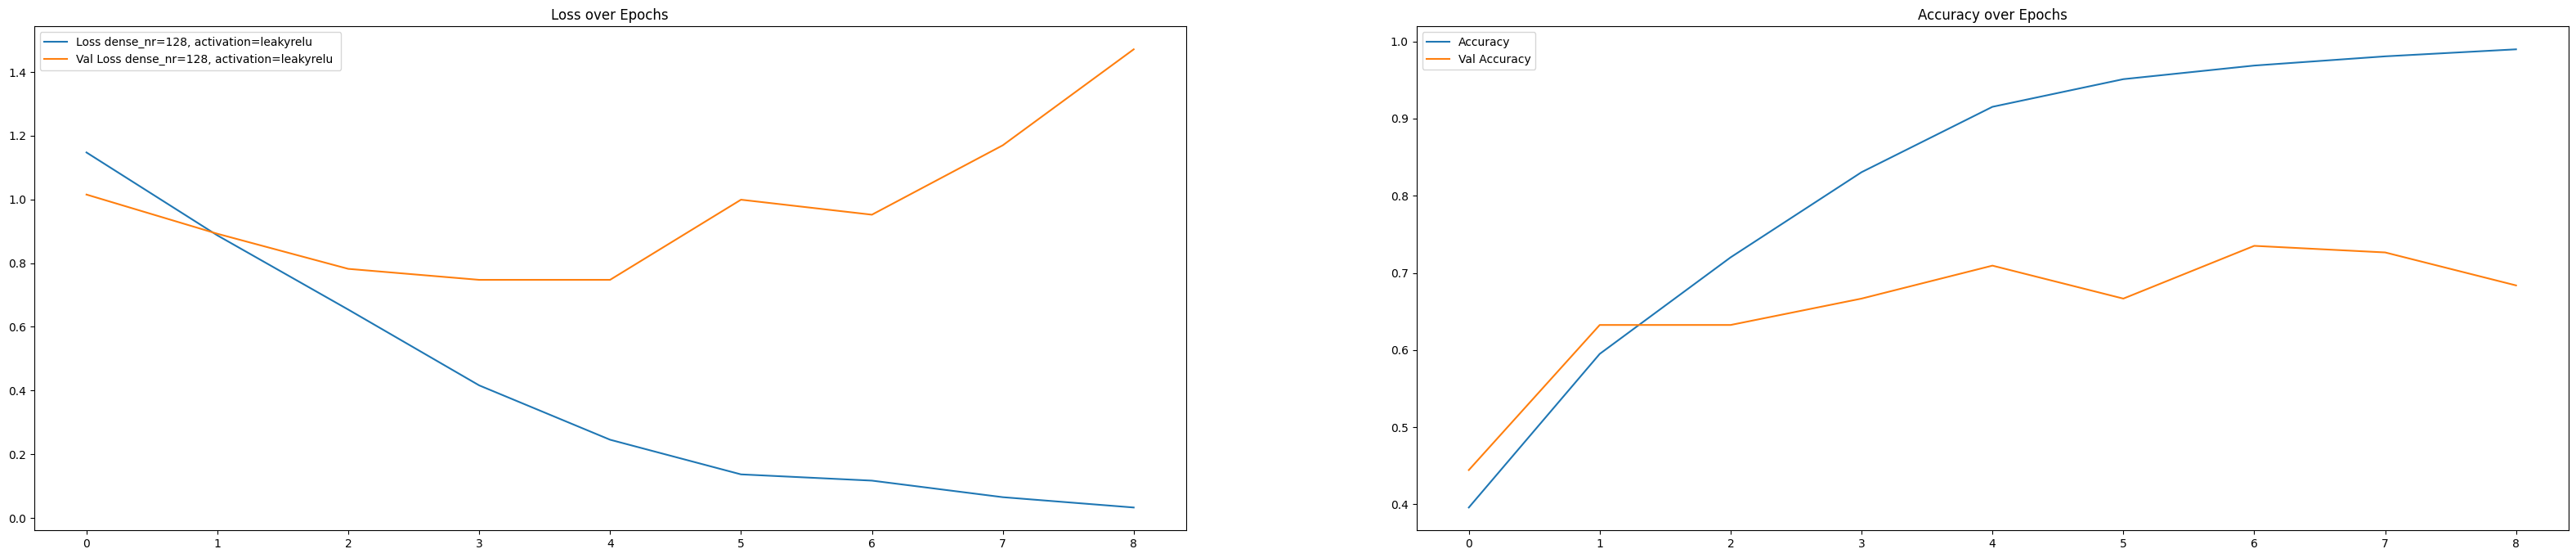

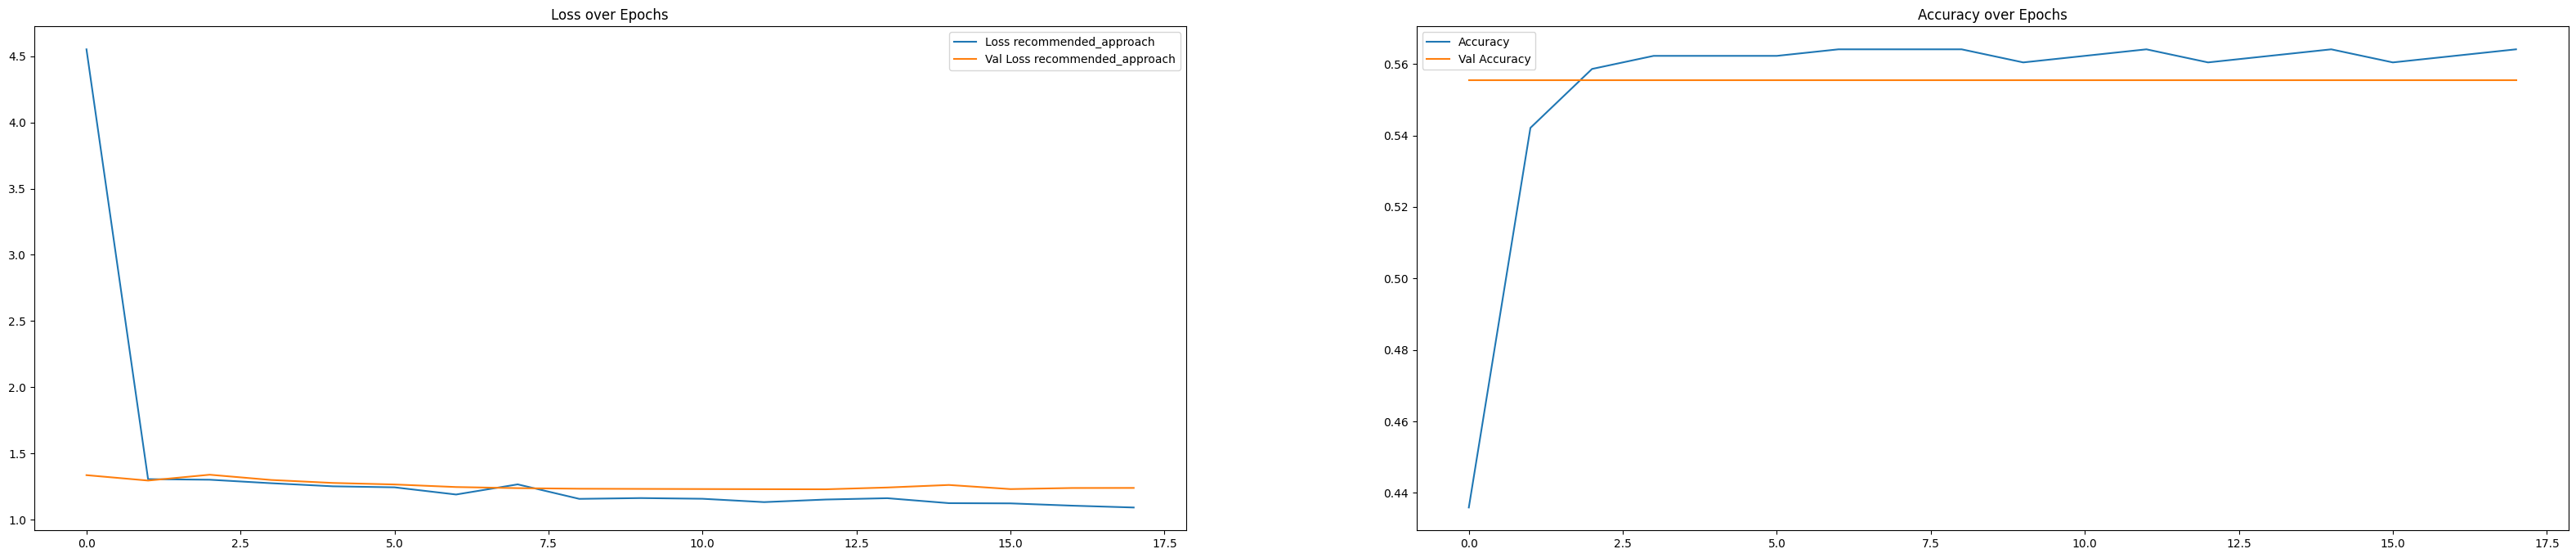

In [16]:
for label, history in histories:
    plt.figure(figsize=(40, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

